# Introduction

Spectral clustering is useful when you have graph (adjacency matrix, or just a full matrix) and you want to identify clusters within this graph. If you think about it, K-means on graphs don't work because graphs dont have any measurable dimensionality to them besides the related weights.

For example, you may have a similiarity matrix you obtained from cosine similiarity relationship between words, and you may want to identify groups of similiar words. Spectral clustering can do this for now.

At a high level, this algorithm takes in a graph or matrix and creates a low-dimensional embeeding from it (reduces its dimensionality), and then apples another clustering algorithm on top of this space (such as K-means) as an approach to identify clusters. 

**Pros**
* Spectral clustering are especially good at identifying really complex cluster structures and can be used to cut graphs.

**Cons**
* It does not scale well to large numbers of instances, and it does not behave well when the clusters have very different sizes.

## The Spectral Algorithm

Suppose for example, we had the following dataset.

Text(0.5, 1.0, 'Moons')

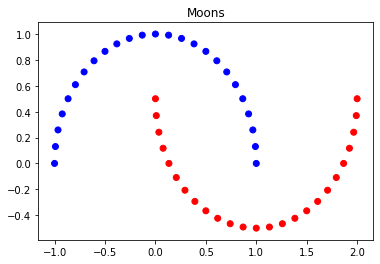

In [39]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=50, shuffle=True, noise=None, random_state=None)
X = np.c_[X, y]

# resort to make it heatmaps non random and review patterns
X = X[X[:,2].argsort()]
X, y = X[:,0:2], X[:,2]

colors = ['r' if _y==1 else 'b' for _y in y]
plt.scatter(X[:,0], X[:,1], c=colors)
plt.title("Moons")

Staple algorithms like kmeans would struggle in cluster graphs like these. What makes this plot unique is its affinity, or connectiveness. In fact, it is primarily defined by its affinity, and we can use this as an observation to define a clustering approach that sensative to this feature.

If we represent this graph into matrix, where the weights represented as the distance between point A and B, we get the following.

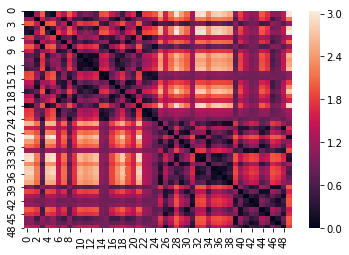

In [40]:
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns


euclid_matrix = euclidean_distances(X)
sns.heatmap(euclid_matrix)

As you can see from here, two groups are identified quite easily simply from looking at the connectivity of the matrix. In otherwords, this is a rank deficient matrix: has as a small rank. For example the following matrix is also rank deficient because the third row of this matrix can be defined from a linear combination of the first two matricies.

$$\left[\begin{array}{ccc}{1} & {0} & {1} \\ {-2} & {-3} & {1} \\ {3} & {3} & {0}\end{array}\right]$$

When we see this kind of relationship, it can best be captured using PCA analysis. Specral clustering takes a affinity matrix and identifies the eigenvectors that explains most of the variance in the matrix. Looking at the matrix, we can imagine that just two eigenvectos: one from the top and one from the bottom half, can capture and represent a large chunk of variance within the matrix.

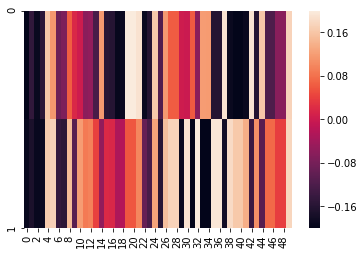

In [41]:
eigen_values, eigen_vectors = np.linalg.eig(euclid_matrix)

# sort eigen vectors by eigen value (get most important ones)
idx = eigen_values.argsort()   
eigen_values, eigen_vectors = eigen_values[idx], eigen_vectors[:,idx]
top_2_eigen_vectors = eigen_vectors[0:2,:]
sns.heatmap(top_2_eigen_vectors)

The larger the eigenvalue, the more representative its eigenvector is for the entire matrix. Using these, spectral clustering takes the lower dimensional embedding of the matrix where a more conventional clustering algorithms (like k-means) can take over and return the final clusters.

https://www.youtube.com/watch?v=uxsDKhZHDcc

## Example

Performance on the same moons dataset, using a sample rbf kernal, as the precomputed affinity matrix into the model.

Text(0.5, 1.0, 'Moons, Spectral Clustering Results')

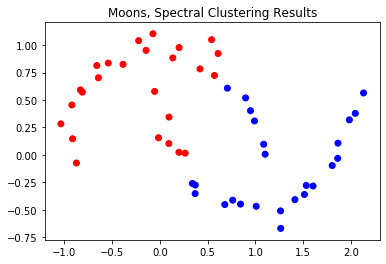

In [55]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import pairwise_kernels
import numpy as np


X, y = make_moons(n_samples=50, shuffle=True, noise=0.07, random_state=None)
sc = SpectralClustering(2, assign_labels='discretize', affinity='precomputed')
sc.fit(pairwise_kernels(X, metric='rbf'))

colors = ['r' if _y==1 else 'b' for _y in sc.labels_]
plt.scatter(X[:,0], X[:,1], c=colors)
plt.title("Moons, Spectral Clustering Results")